<!--HEADER-->
[*Guia de aulas da disciplina de Modelagem Matemática*](https://github.com/rmsrosa/modelagem_matematica) *do* [*IM-UFRJ*](https://www.im.ufrj.br).

<!--NAVIGATOR-->

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/16.00-Aula16.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
&nbsp;
<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/modmat2019p1?filepath=aulas/16.00-Aula16.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;
<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/16.00-Aula16.slides.html"><img align="left" src="https://rmsrosa.github.io/jupyterbookmaker/badges/slides_badge.svg" alt="Open slides" title="Open and View Slides"></a>
&nbsp;

[<- Aula 15: Exemplos de modelagem com EDP](15.00-Aula15.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Aula 17: Séries e transformada de Fourier, algumas aplicações ->](17.00-Aula17.ipynb)

---


# Aula 16:  Exercício em sala

### Objetivos:

- fazer um código em python que resolva a eq. de Poisson em uma região retangular via diferenças finitas
- aplicar ao cálculo de potencial eletrico dentro de uma caixa condutora
- verificar "método das cargas imagens" e "Gaiola de Faraday"

### Importando as bibliotecas necessárias

In [1]:
from os.path import join
from IPython.display import Image


def path_files_aula14(filename=''):
    return join('..', 'dados', 'edp', filename)

## Eq. de Poisson 2d

- incógnita $u:D \subset \mathbb{R}^2 \to \mathbb{R}$
$$ \partial_x^2 u + \partial_y^2 u = f(x,y)$$
com $f$ função dado.


- veremos caso particular de condições de bordo (Dirichlet): todos os nodos do bordo estão dados
$$ u|_{\partial D} = h : \partial D \to \mathbb{R}$$

### Discretizaçao num dominio retangular $D=[0,L_x]\times [0,L_y]$

- [Eq. de Poisson discreta](https://en.wikipedia.org/wiki/Discrete_Poisson_equation)
- consideramos discretização com $\Delta x = \Delta y$,
$$ u(i,j) := u(i \Delta x, j \Delta y),\  i=0,..,n_x-1, \ j=0,..,n_y-1$$
- os valores $u(i,j)$ correspondientes ao interior de $D$ podem ser compilados em um vetor (ordenados "naturalmente")
$$ U = (u(1,1),u(2,1),u(3,1),...,u(n_x-2,1),u(1,2),u(2,2),...) $$
de tamanho $(n_x-2) (n_y -2)$
- pensando no laplaciano discreto, a eq. em diferenças finitas toma a forma:
$$ \delta^2_x u + \delta^2_y u (i,j) = \frac{1}{\Delta x^2} ( u(i+1,j)+u(i-1,j)+u(i,j+1)+u(i,j-1)-4u(i,j)) = f(i,j)$$
- as condições de bordo são $u(i,j) = h(i,j)$ para $(i,j)$ representando pontos no bordo

- pode-se juntar todas as eqs. algebricas resultantes em um grande sistema linear da forma
$$ A U = b $$
onde $A$ é uma matriz quadrada com $(n_x-2) (n_y -2)$ linhas, que é esparça com entradas $0,-1$ ou $4$, e $b$ é um vetor que tem of $f(i,j)$ correspondentes ao interior de $D$ assim como os $h(i,j)$ correspondentes ao bordo
- como $A$ é esparça, o sistema pode-se resolver em muitos casos, obtendo a aproximação numérica $u(i,j)$ para $u(x,y)$

**Obs**: uma modelagem concreta consiste em que $u(x,y)$ descreve o potencial eletrico gerado por uma distribuição de carga $\rho(x,y)$ via $f(x,y) = -\rho(x,y)/\epsilon_0$ ([wiki](https://en.wikipedia.org/wiki/Electric_potential)). 

Se tem uma superficie conductora $\Sigma$, $u$ tem uma condiçao de bordo nesta superficie: $u|_\Sigma$ é constante (suponhamos zero se o condutor está conectado 'a terra'). 

É interessante achar o potencial eletrico dado por diversas distribuicoes de carga e configuracoes de superficies condutoras: 

- verificar ['cargas imagens'](https://en.wikipedia.org/wiki/Method_of_image_charges), subdividindo o dominio e verificando que a solução num sub-compartimento coincide com a soma dos potenciais incluindo cargas imagens fora.
- verificar o efeito ['gaiola de Faraday'](https://en.wikipedia.org/wiki/Faraday_cage) colocando uma gaiola dentro do dominio, cargas fora da gaiola, e verificando que o potencial dentro é constante.

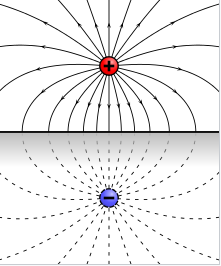

In [2]:
Image(filename=path_files_aula14('cargas_eletricas.png'), width=300)

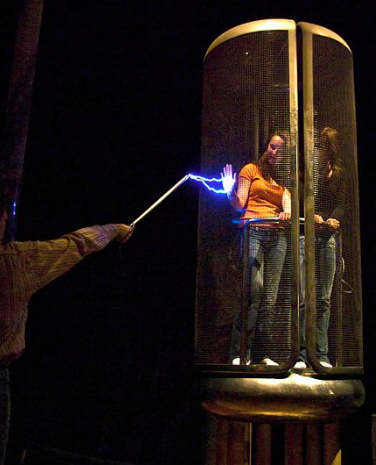

In [3]:
Image(filename=path_files_aula14('gaiola_faraday.png'), width=300)

## Roteiro:
- Fazer um algoritmo que defina a matriz $A$ e o vetor $b$ a partir da configuração, de $f$ e de $h$
- investigar qual solver de sistemas lineares usar para o caso em que $A$ é grande (sabemos que é esparça!)
- fazer um solver para a eq. de Poisson: recebe $\Delta x$, $f$ e $h$ e devolve $u(i,j)$
- aplicar ao caso em que $f$ é uma distribuição de cargas (pontuais) no dominio e $h=0$, verificar que a solução faz sentido físico
- modificar o algoritmo para incorporar sub-dominios e suas condições de bordo, verificar o método das imagens e gaiola de Faraday

In [4]:
# gerar slides deste notebook desde code:

!jupyter nbconvert 16.00-Aula16.ipynb --to slides --SlidesExporter.reveal_scroll=True

[NbConvertApp] Converting notebook 16.00-Aula16.ipynb to slides
[NbConvertApp] Writing 665603 bytes to 16.00-Aula16.slides.html


<!--NAVIGATOR-->

---
[<- Aula 15: Exemplos de modelagem com EDP](15.00-Aula15.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Aula 17: Séries e transformada de Fourier, algumas aplicações ->](17.00-Aula17.ipynb)

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/16.00-Aula16.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/modmat2019p1?filepath=aulas/16.00-Aula16.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>

<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/16.00-Aula16.slides.html"><img align="left" src="https://rmsrosa.github.io/jupyterbookmaker/badges/slides_badge.svg" alt="Open slides" title="Open and View Slides"></a>
&nbsp;